In [21]:
import os
from os import listdir
import numpy as np
from skimage import data, io, filters
import skimage
from skimage.color import rgb2gray, label2rgb
from skimage.measure import label, regionprops
import skimage.exposure as exposure
import matplotlib.pyplot as plt
from skimage.morphology import closing, square, remove_small_holes, remove_small_objects
from skimage.segmentation import clear_border
import matplotlib.patches as mpatches
from skimage.filters import threshold_mean

In [82]:
list=[] #define list to be filled with images from directory
for images in os.listdir("./"):
    if images.endswith((".jpg")):
        list.append(images)
list.append(list.pop(list.index("LT05_L1GS_153043_19990727_20200908_02_T2.jpg")))
print(*list, sep="\n")
print("length:",len(list)) #images in order from 02/01/1999 to 04/22/1999

LT05_L1TP_153042_19990201_20200908_02_T1.jpg
LT05_L1TP_153042_19990217_20200908_02_T1.jpg
LT05_L1TP_153042_19990305_20200908_02_T1.jpg
LT05_L1TP_153042_19990321_20200908_02_T1.jpg
LT05_L1TP_153042_19990406_20200908_02_T1.jpg
LT05_L1TP_153042_19990422_20200908_02_T1.jpg
LT05_L1TP_153042_19990508_20200908_02_T1.jpg
LT05_L1TP_153042_19990524_20200908_02_T1.jpg
LT05_L1TP_153042_19990609_20200908_02_T1.jpg
LT05_L1TP_153042_19990625_20200908_02_T1.jpg
LT05_L1TP_153042_19990727_20200907_02_T1.jpg
LT05_L1TP_153043_19990217_20200908_02_T1.jpg
LT05_L1TP_153043_19990305_20200908_02_T1.jpg
LT05_L1TP_153043_19990321_20201008_02_T1.jpg
LT05_L1TP_153043_19990406_20200908_02_T1.jpg
LT05_L1TP_153043_19990422_20200908_02_T1.jpg
LT05_L1TP_153043_19990508_20200908_02_T1.jpg
LT05_L1TP_153043_19990524_20200908_02_T1.jpg
LT05_L1TP_153043_19990609_20200908_02_T2.jpg
LT05_L1TP_153043_19990625_20200908_02_T1.jpg
LT05_L1GS_153043_19990727_20200908_02_T2.jpg
length: 21


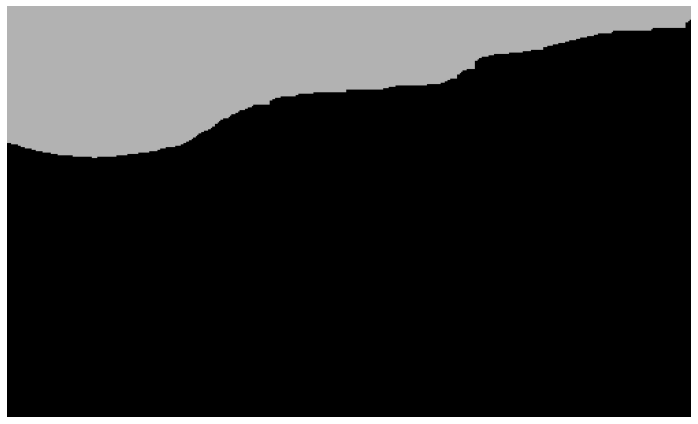

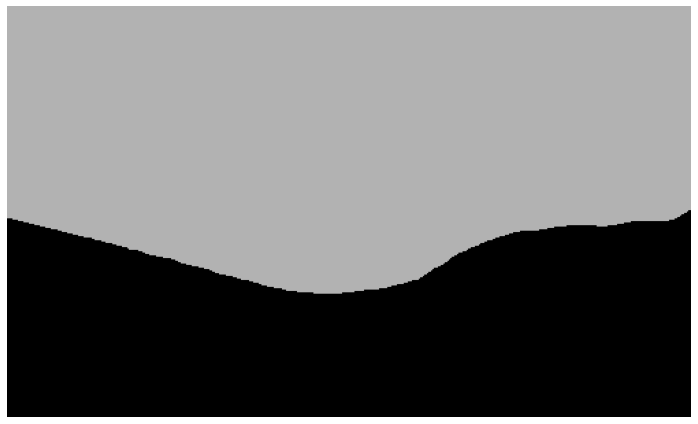

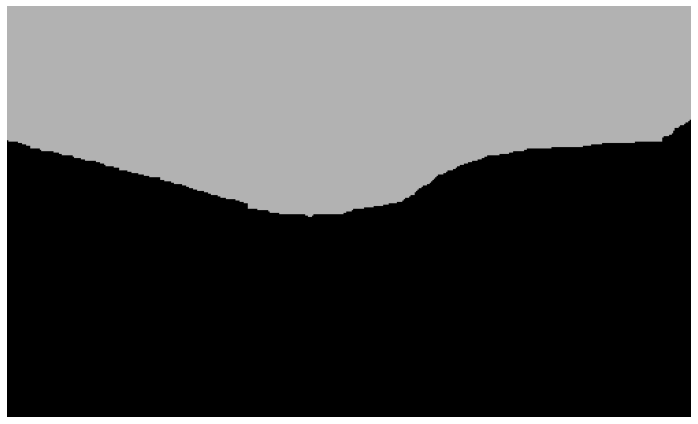

LT05_L1TP_153042_19990321_20200908_02_T1.jpg Area: 53


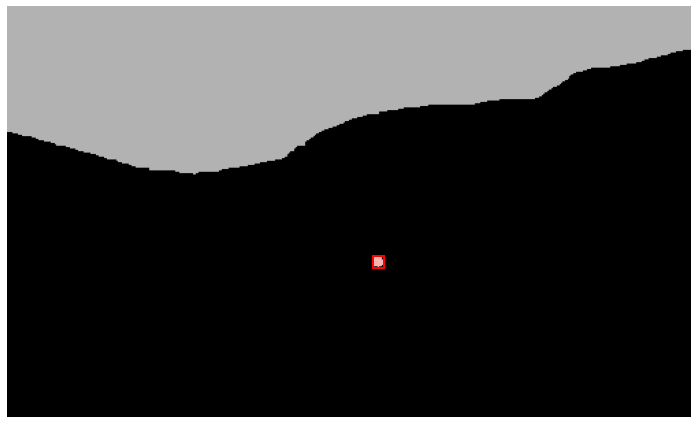

LT05_L1TP_153042_19990406_20200908_02_T1.jpg Area: 52


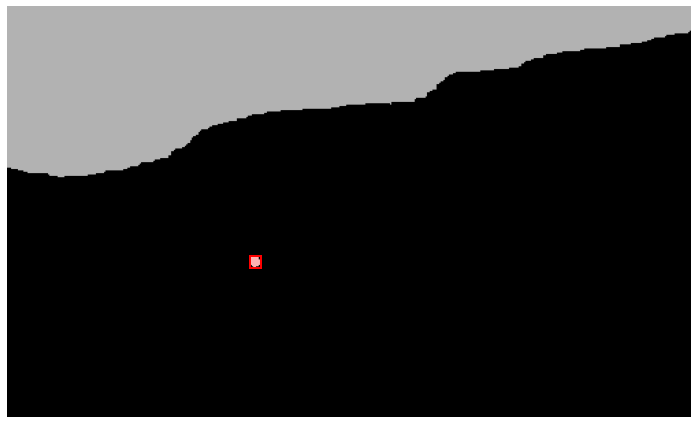

LT05_L1TP_153042_19990422_20200908_02_T1.jpg Area: 40


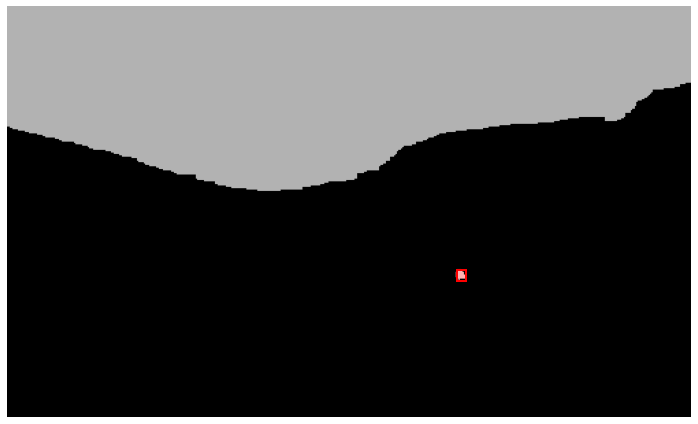

LT05_L1TP_153042_19990508_20200908_02_T1.jpg Area: 40


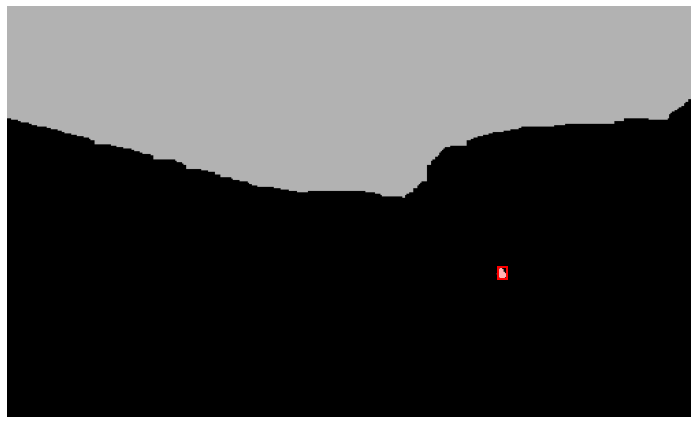

LT05_L1TP_153042_19990524_20200908_02_T1.jpg Area: 53


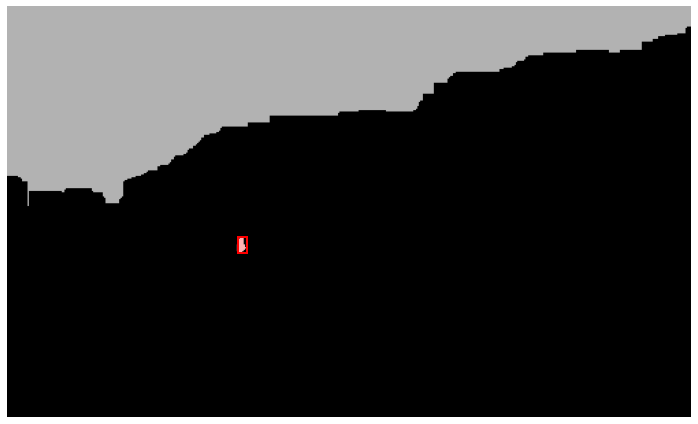

LT05_L1TP_153042_19990609_20200908_02_T1.jpg Area: 68


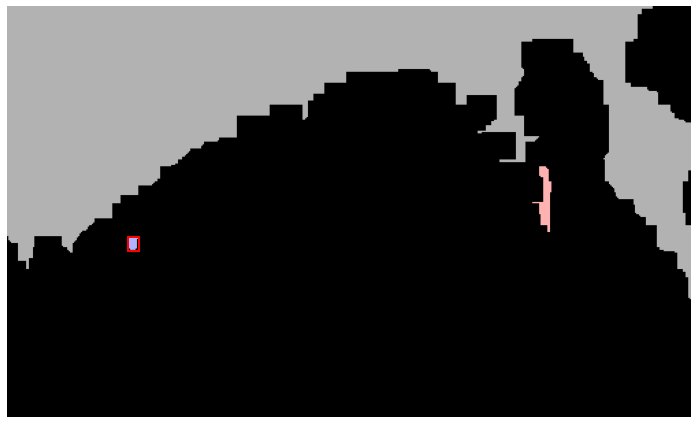

LT05_L1TP_153042_19990625_20200908_02_T1.jpg Area: 25


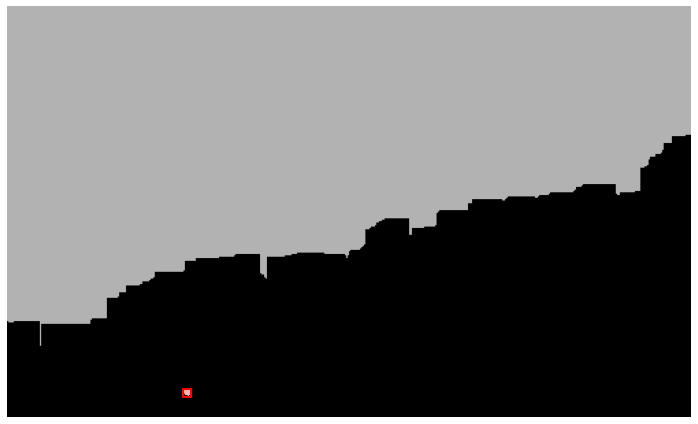

LT05_L1TP_153042_19990727_20200907_02_T1.jpg Area: 43


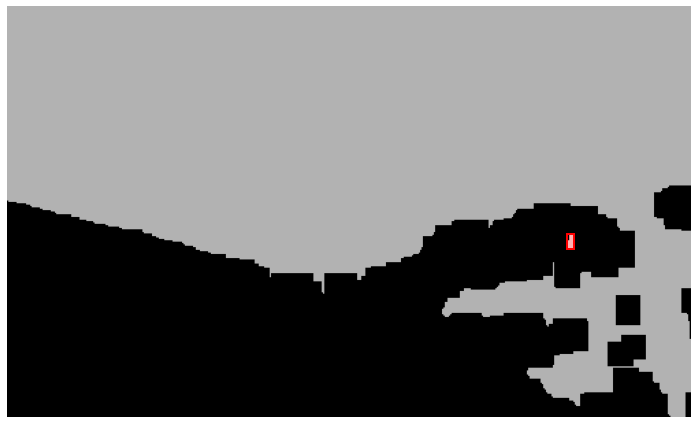

[53, 52, 40, 40, 53, 68, 25, 43]


In [100]:
#choose the first 6 images in list, which are all similar
Area=[] #list of areas
for images in list[0:11]:
    read=io.imread(images)
    readzoom=read[5800:6100,1400:1900,:] #zoom into a very specific region with less noise
    read_gray_unscaled=rgb2gray(readzoom) #convert images to grayscale
    read_gray_scaled=exposure.rescale_intensity(read_gray_unscaled,out_range=np.uint8)
    read_thres=threshold_mean(read_gray_scaled) #implement mean threshold and target "closed" portions of the image
    read_binary=closing(read_gray_scaled>read_thres,square(18))
    read_binary=remove_small_holes(read_binary,18) #clean up noise
    read_binary=remove_small_objects(read_binary,15)
    #plt.figure()
    #plt.imshow(read_binary)
    cleared=clear_border(read_binary) #declare label to use in regionprops
    read_label=label(cleared)
    image_label_overlay = label2rgb(read_label, image=read_binary, bg_label=0)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image_label_overlay)
    for region in regionprops(read_label):
        if region.area<70: #target areas with area less than 70 pixels, and show where those regions are located
            minr, minc, maxr, maxc = region.bbox
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)
            Area.append(region.area)
            print(images,"Area:",region.area) #print the final image, image name, and area
    ax.set_axis_off()
    plt.tight_layout()
    plt.show() 
print(Area)

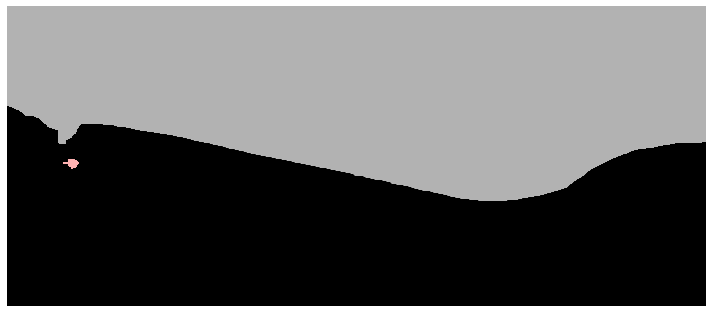

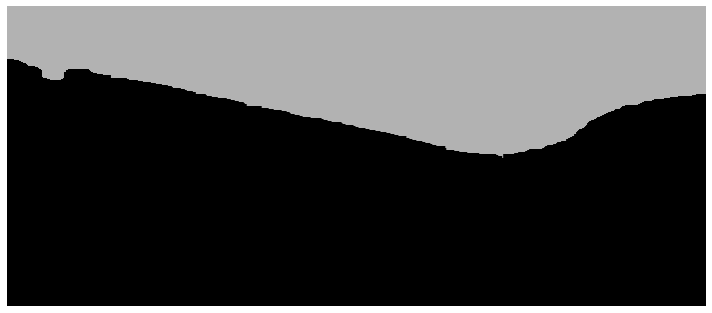

LT05_L1TP_153043_19990321_20201008_02_T1.jpg Area: 55


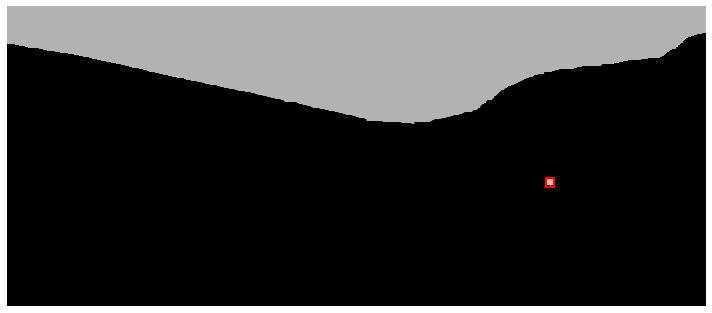

LT05_L1TP_153043_19990406_20200908_02_T1.jpg Area: 55


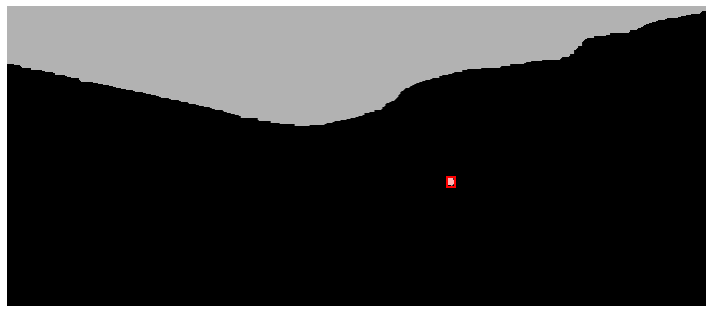

LT05_L1TP_153043_19990422_20200908_02_T1.jpg Area: 40


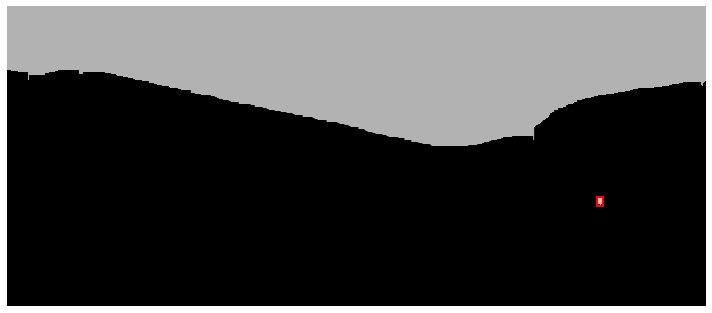

LT05_L1TP_153043_19990508_20200908_02_T1.jpg Area: 34


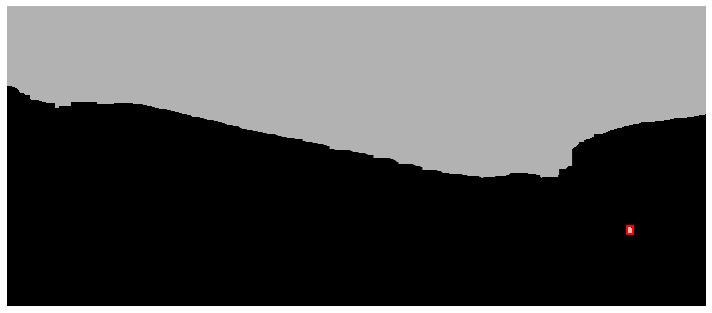

LT05_L1TP_153043_19990524_20200908_02_T1.jpg Area: 39


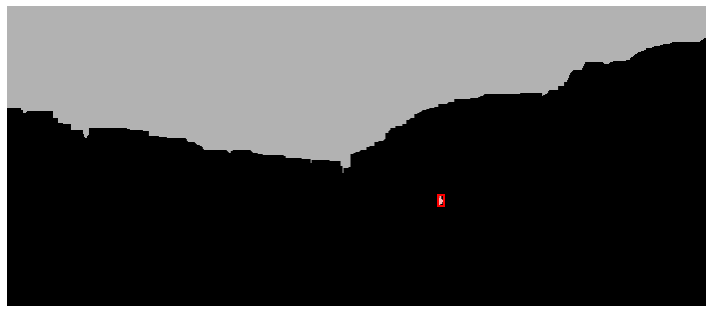

LT05_L1TP_153043_19990609_20200908_02_T2.jpg Area: 23


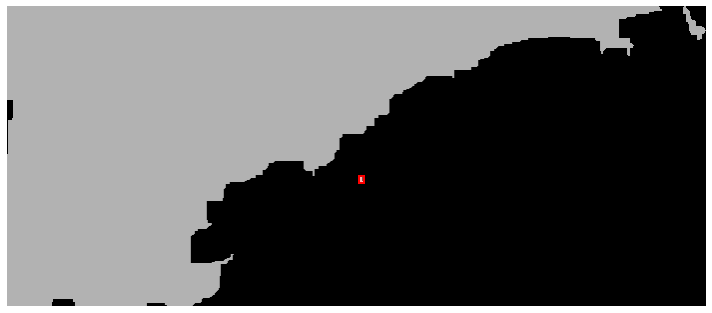

LT05_L1TP_153043_19990625_20200908_02_T1.jpg Area: 21


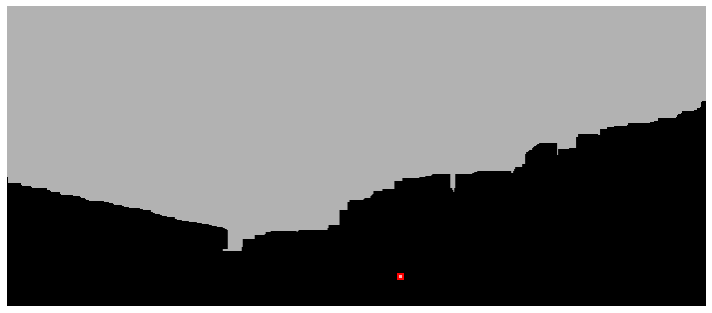

LT05_L1GS_153043_19990727_20200908_02_T2.jpg Area: 44


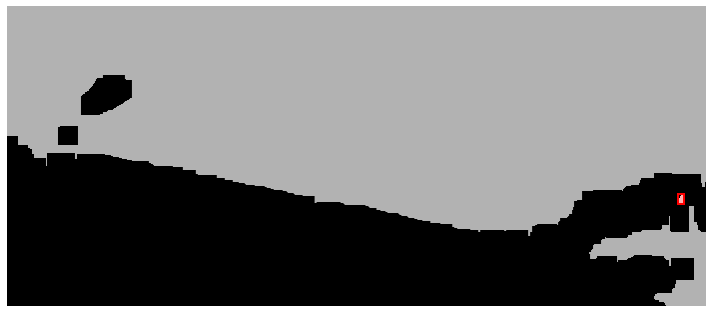

[53, 52, 40, 40, 53, 68, 25, 43, 55, 55, 40, 34, 39, 23, 21, 44]


In [101]:
#Choose the last 4 images, which are also similar
for images in list[11:21]:
    read=io.imread(images)
    readzoom=read[400:700,2200:2900,:] #zoom into a very specific region with less noise, different from above region
    read_gray_unscaled=rgb2gray(readzoom) #convert images to grayscale
    read_gray_scaled=exposure.rescale_intensity(read_gray_unscaled,out_range=np.uint8)
    read_thres=threshold_mean(read_gray_scaled) #implement mean threshold and target "closed" portions of the image
    read_binary=closing(read_gray_scaled>read_thres,square(18))
    read_binary=remove_small_holes(read_binary,18) #clean up noise
    read_binary=remove_small_objects(read_binary,18)
    #plt.figure()
    #plt.imshow(read_binary)
    cleared=clear_border(read_binary) #declare label to use in regionprops
    read_label=label(cleared)
    image_label_overlay = label2rgb(read_label, image=read_binary, bg_label=0)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image_label_overlay)
    for region in regionprops(read_label):
        if region.area<70:  #target areas with area less than 70 pixels, and show where those regions are located
            minr, minc, maxr, maxc = region.bbox
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)
            Area.append(region.area)
            print(images,"Area:",region.area) #print the final image, image name, and area
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()
print(Area)

In [104]:
#print(Area)
#import pandas as pd
#data={
#    'images': list,
#    'Pixel Areas': Area
#}
#data_table=pd.DataFrame(data)
#print(data_table)